# Test CelebA DataModule

This notebook tests the CelebA DataModule implementation by loading the dataset and displaying some sample images.

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import torch
from src.data.celeba_datamodule import CelebADataModule

## Initialize the DataModule

In [2]:
# Initialize the datamodule
datamodule = CelebADataModule(
    data_dir="../data",
    batch_size=32,
    image_size=64,
    num_workers=4
)

## Download and prepare the data

In [3]:
# This will download the dataset if it's not already downloaded
# datamodule.prepare_data()
datamodule.setup()

## Display sample images

In [4]:
def show_images(images, title=""):
    """Display a grid of images."""
    # Denormalize images
    images = images * 0.5 + 0.5  # Scale from [-1, 1] to [0, 1]
    
    # Create a grid of images
    grid_size = int(len(images) ** 0.5)
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.ravel()
    
    for idx, img in enumerate(images):
        if idx >= len(axes):
            break
        # Convert from (C, H, W) to (H, W, C) for matplotlib
        img = img.permute(1, 2, 0).cpu().numpy()
        axes[idx].imshow(img)
        axes[idx].axis('off')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

tensor([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
        [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 

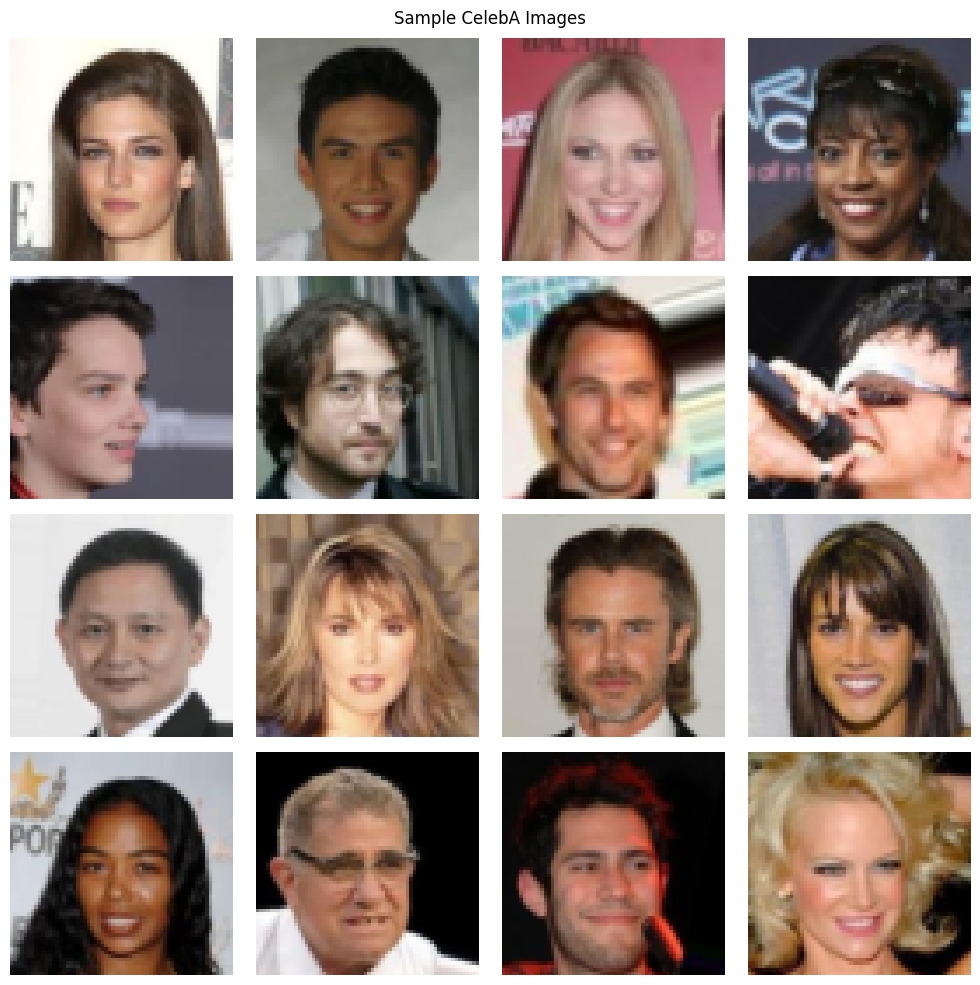

In [6]:
# Get a batch of training images
train_loader = datamodule.train_dataloader()
batch = next(iter(train_loader))
print(batch[1][:16])  # Should be a tuple (images, labels)

images = batch[0][:16]  # Get first 16 images from the batch

# Display the images
show_images(images, "Sample CelebA Images")

## Check dataset statistics

In [6]:
print(f"Number of training samples: {len(datamodule.data_train)}")
print(f"Number of validation samples: {len(datamodule.data_val)}")
print(f"Number of test samples: {len(datamodule.data_test)}")
print(f"Number of attributes: {datamodule.num_classes}")
print(f"Image size: {images[0].shape}")

Number of training samples: 162770
Number of validation samples: 19867
Number of test samples: 19962
Number of attributes: 40
Image size: torch.Size([3, 64, 64])
